## Markov Chain Stationary Distribution Sample code

#### with 4 discrete states and Pij Transition prob matrix

#### Ref: <https://github.com/SungchulLee/reinforcement_learning>

#### Algorithm

1. Generate a simulated path of many steps
  
1. For each time step n, using the first n steps of sample path compute empirical PMF pi_n

    - Theorem
      as n goes infinity under mild conditions, pi_n[i] = pi[i]

In [48]:
import numpy as np
# set states var
states = [0, 1, 2 ,3]
n = len(states)
# set trainsition prob mat
l = 0.3
r = 0.3
s = 1.0 - l - r
P = np.empty((n,n))
P[0,:] = [s+l,r,0,0]
P[1,:] = [l,s,r,0]
P[2,:] = [0,l,s,r]
P[3,:] = [0,0,l,s+r]
print(P)

[[0.7 0.3 0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.7]]


In [49]:
# set simulation var
np.random.seed(1)
current_state = np.random.choice(states)
num_steps = 1000
visit_log = np.zeros((n, num_steps))

In [50]:
# algorithm start
for s in range(num_steps):
    visit_log[current_state,s] = 1.
    next_state = np.random.choice(states,p=P[current_state, :])
    current_state = next_state

In [51]:
#print(visit_log)
temp = np.cumsum(visit_log,axis=1)
#print(temp)
pi = temp/(np.arange(num_steps)+1).reshape(1,-1)
print(pi)
print(np.cumsum(pi,axis = 0)[3,:]) # check whether sum of PMF is 1 at n th step

[[0.         0.         0.         ... 0.29058116 0.29029029 0.29      ]
 [1.         0.5        0.33333333 ... 0.25951904 0.25925926 0.259     ]
 [0.         0.5        0.33333333 ... 0.23346693 0.23323323 0.233     ]
 [0.         0.         0.33333333 ... 0.21643287 0.21721722 0.218     ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

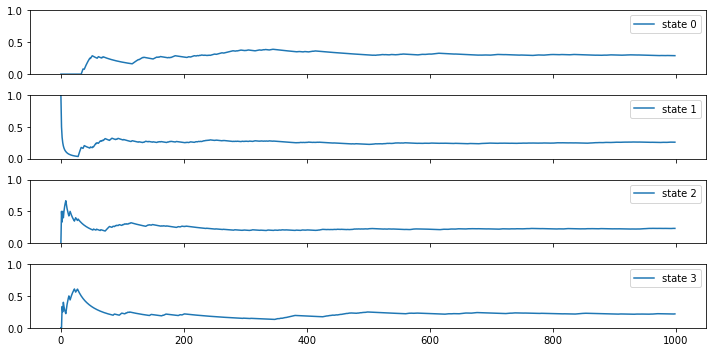

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = n,ncols = 1,figsize=(10,5),sharex = True)
for s in range(n):
    ax[s].plot(pi[s], label = "state {}".format(str(s)))
    ax[s].legend(loc="upper right")
    ax[s].set_ylim([0,1])
plt.tight_layout()
plt.show()    


#### conclusion
    - you can see the transient response til 200th step. After that, PMF settles

# Exercise
![image.png](https://github.com/DonghyunSung-MS/ReinforcementLearning_study/blob/master/Markov_chain/day1_Markov_chain_exercise.png?raw=true)

1. Compute the stationary distribution of the following Markov Chain when r = 5
1. Compare the stationary distribution obtained from 1 with the one from simulation.

#### From lecture <https://www.youtube.com/user/sungchulyonseiackr>

In [53]:
import numpy as np

r = 5 # number of balls = 5 also states
states  = []
for s in range(r+1):
    states.append(s)
print(states) # check states
num_states = len(states)
print(num_states) # check number of states

[0, 1, 2, 3, 4, 5]
6


In [54]:
P = np.zeros((num_states,num_states)) # Transition matrix
for k in range(num_states):
    if k<=0:
        P[k, k+1] = (r-k)/r
    elif k>=5:
        P[k, k-1] = k/r
    else:
        P[k, k+1] = (r-k)/r
        P[k, k-1] = k/r        
    # it also works below code
    '''
    try:
        P[k, k+1] = (r-k)/r
        P[k, k-1] = k/r
    except:
        P[k, k-1] = k/r
        continue
    '''
print(P)

[[0.  1.  0.  0.  0.  0. ]
 [0.2 0.  0.8 0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.  1.  0. ]]


1. From matlab, we get [ 0.0313 0.1563 0.3125 0.3125 0.1562 0.0312] 
    * pi * P = pi
    * (P' - I) * pi' = 0 ->  pi' is null-vector of (P' - I)
    * it is easy to obtain in matlab by null (Matrix)

In [77]:
# set initial condition with randomness
np.random.seed()
current_state = np.random.choice(states)
print(current_state)

0


In [78]:
# set simulation
num_steps = 10000
np.random.seed()
visit_log = np.zeros((num_states,num_steps))

In [79]:
# algorithms start
for step in range(num_steps):
    visit_log [current_state,step] = 1.0
    next_state = np.random.choice(states,p=P[current_state,:])
    current_state = next_state
pi = np.cumsum(visit_log,axis=1)/(np.arange(num_steps)+1).reshape(1,-1)


In [80]:
# check whether sum of PMF at each step is 1
#print(np.cumsum(pi,axis=0)[num_states-1,:])
print("The empirical PMF is ")
print(pi[:,num_steps-1])

The empirical PMF is 
[0.0349 0.1571 0.3101 0.3114 0.155  0.0315]


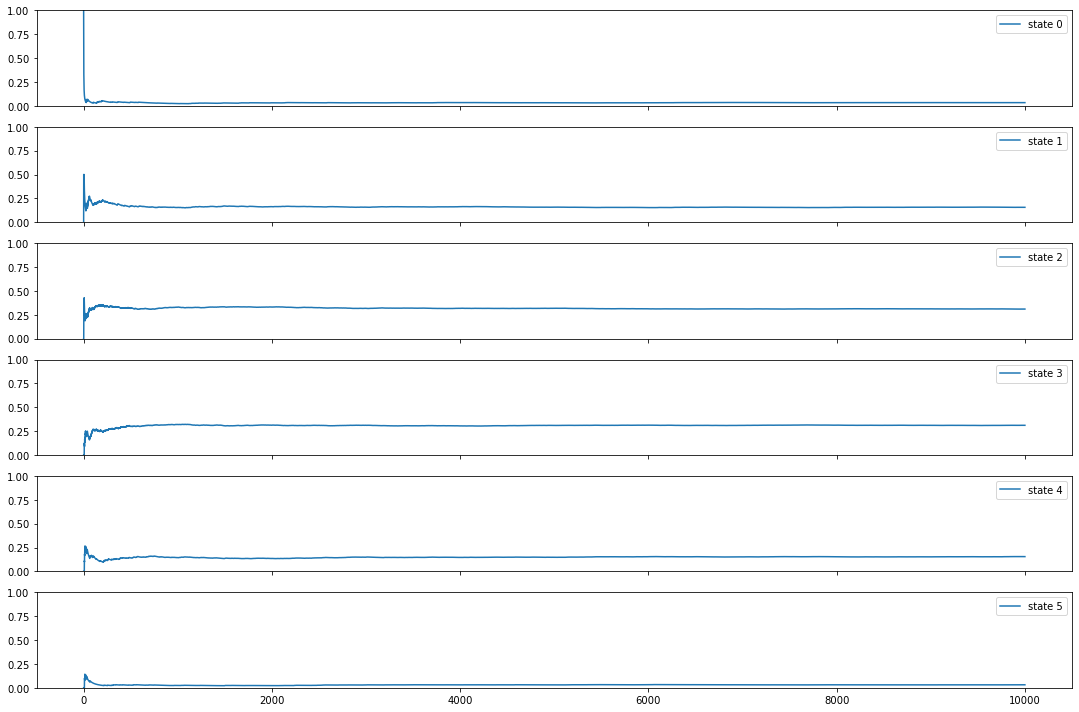

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = num_states , ncols = 1, figsize = (15,10), sharex = True)
for s in range(num_states):
    axes[s].plot(pi[s], label = "state {}".format(str(s)))
    axes[s].legend(loc="upper right")
    axes[s].set_ylim([0,1])
plt.tight_layout()
plt.show() 
    


#### conclusion
    - computation method and empricial method have almost same result with samll error